In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors 
from itertools import count
import json
import networkx as nx
from create_product_space import create_product_space

In [2]:
# Load and prepare data to plot in product space: 
# -- below: total exports of Ukraine in 2016 per product only for products with > $40 million in exports, plotted as the size of each node
# -- columns = ['year','hs_product_code','export_value']
df = pd.read_csv('data/exports_Ukraine_2016.csv')
# Add attributes that we want to plot
# Below: 
# -- node color = based on Atlas 
# -- node size = export value which is standardized to 0.1 - 1
dfc = pd.read_csv('data/hs4_hex_colors_intl_atlas.csv')
df = pd.merge(df,dfc[['hs4','color']],how='left',left_on='hs_product_code',right_on='hs4')
# size will be based on the export value, standardized to a scale of 0.1 to 1
size_var = 'export_value'
minsize = 0.1
maxsize = 1
alpha = maxsize-minsize
Xl = df[df[size_var]>0][size_var].quantile(0.10)
Xh = df[df[size_var]>0][size_var].quantile(0.95)
df['node_size'] = 0
df.loc[ df[size_var]>=Xh,'node_size'] = maxsize 
df.loc[ (df[size_var]<=Xl) & (df[size_var]!=0),'node_size'] = minsize
df.loc[ (df[size_var]<Xh) & (df[size_var]>Xl),'node_size'] = ((alpha*(df[size_var]-Xl))/(Xh-Xl))+(1-alpha)
df.loc[ (df[size_var]<Xh) & (df[size_var]>0),'node_size'] = ((alpha*(df[size_var]-Xl))/(Xh-Xl))+(1-alpha)
df.head()

,year,location_code,hs_product_code,export_value,hs4,color,node_size
0,2016,UKR,402,54113624,402.0,#ffe2af,0.105942
1,2016,UKR,409,104235738,409.0,#ffe2af,0.147780
2,2016,UKR,713,118626949,713.0,#ffd629,0.159792
3,2016,UKR,802,77142217,802.0,#ffd629,0.125164
4,2016,UKR,1001,2547124676,1001.0,#ffd629,1.000000


/Users/shg309/Dropbox (Personal)/Education/hks_cid_growth_lab/misc/product_space_viz/create_product_space.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft['count'] = 1
/Users/shg309/miniconda/envs/localcid/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/shg309/miniconda/envs/localcid/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


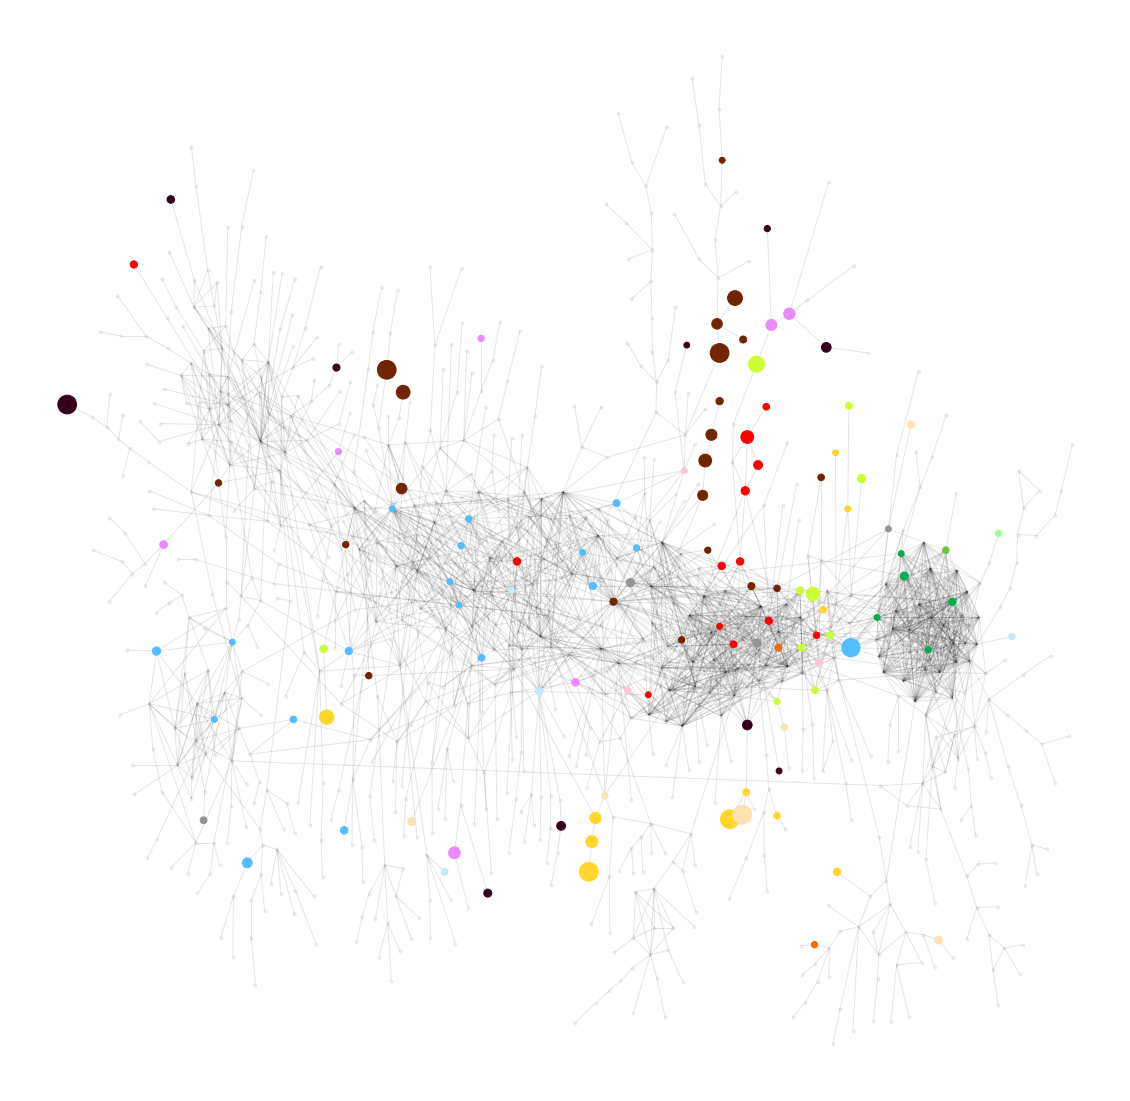

In [3]:
# Create product space
create_product_space(df_plot_dataframe=df,
                     df_plot_node_col='hs_product_code',
                     df_plot_attribute_cols=['color','node_size'])